In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import os



In [17]:
# Load your data
df = pd.read_csv(r"C:\Users\User\OneDrive - 2020 Companies\Desktop\Ingraham Boys Soccer\metroleague_elo_log.csv")

# Filter for 2024/25 season
df = df[df['Season'] == '2024-25']

# Set logo directory
logo_dir = r"C:\Users\User\OneDrive - 2020 Companies\Desktop\Ingraham Boys Soccer\School logos" 

# Style dictionary
school_style = {
    'Ballard': {'color': '#dc1f27', 'logo': os.path.join(logo_dir, 'Ballard.png')},
    'Roosevelt': {'color': '#00824e', 'logo': os.path.join(logo_dir, 'Roosevelt.png')},
    'Garfield': {'color': '#542b78', 'logo': os.path.join(logo_dir, 'Garfield.png')},
    'Ingraham': {'color': '#0072BB', 'logo': os.path.join(logo_dir, 'Ingraham.png')},
    'Seattle Prep': {'color': '#28398b', 'logo': os.path.join(logo_dir, 'SeattlePrep.png')},
    'Eastside Catholic': {'color': '#ff6809', 'logo': os.path.join(logo_dir, 'eastside-catholic.png')},
    'Cleveland': {'color': '#b42024', 'logo': os.path.join(logo_dir, 'Cleveland.png')},
    'Chief Sealth': {'color': '#61afe0', 'logo': os.path.join(logo_dir, 'ChiefSealth.png')},
    'Lakeside (Seattle)': {'color': '#6c263b', 'logo': os.path.join(logo_dir, 'Lakeside.png')},
    'Nathan Hale': {'color': '#020f53', 'logo': os.path.join(logo_dir, 'NathanHale.png')},
    'West Seattle': {'color': '#1e2559', 'logo': os.path.join(logo_dir, 'WestSeattle.png')},
    "O'Dea": {'color': '#fab21c', 'logo': os.path.join(logo_dir, "ODea.png")},
    'Rainier Beach': {'color': '#e23b25', 'logo': os.path.join(logo_dir, 'RainierBeach.png')},
    'Bishop Blanchet': {'color': '#00742b', 'logo': os.path.join(logo_dir, 'BishopBlanchet.png')},
    'Lincoln (Seattle)': {'color': '#cd2027', 'logo': os.path.join(logo_dir, 'Lincoln.png')},
    'Seattle Academy': {'color': '#cc0001', 'logo': os.path.join(logo_dir, 'SeattleAcademy.png')},
    'Franklin': {'color': '#065f03', 'logo': os.path.join(logo_dir, 'Franklin.png')},
}
# === HELPER ===
def load_logo_with_background(path, bg_color=(255, 255, 255)):
    img = Image.open(logo_path).convert("RGBA")
    return Image.alpha_composite(background, img).convert("RGBA")


<ipython-input-20-91522e7200dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Game Order'] = df.index
<ipython-input-20-91522e7200dd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Game Order'] = df.index


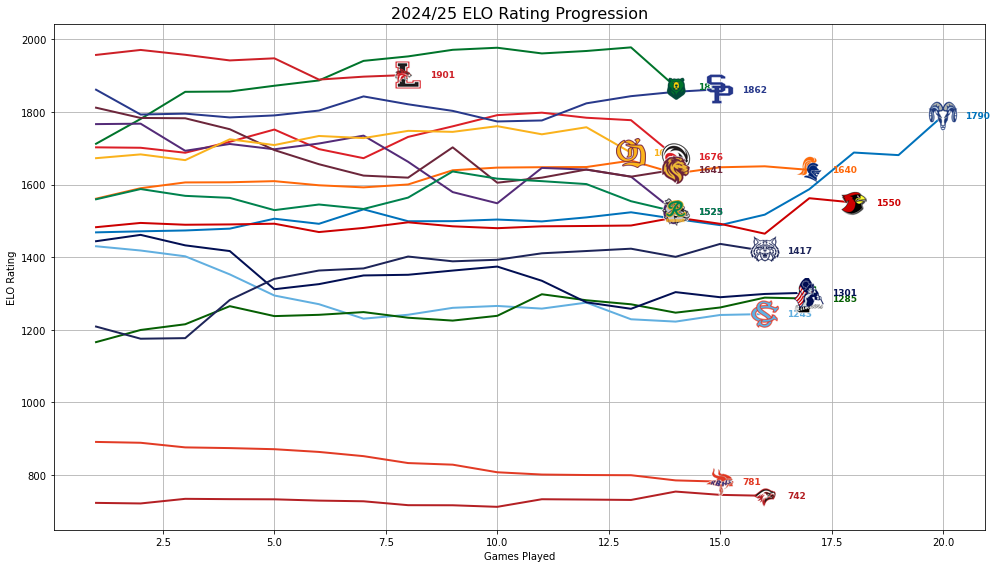

In [20]:
# Create combined DataFrame of home and away
home_df = df[['Home Team', 'Home Match #', 'Home ELO After']]
home_df.columns = ['Team', 'Match #', 'ELO']
home_df['Game Order'] = df.index

away_df = df[['Away Team', 'Away Match #', 'Away ELO After']]
away_df.columns = ['Team', 'Match #', 'ELO']
away_df['Game Order'] = df.index

combined = pd.concat([home_df, away_df], ignore_index=True)
combined = combined.sort_values(by=['Team', 'Game Order'])
combined['Games Played'] = combined.groupby('Team').cumcount() + 1

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

for team, team_df in combined.groupby('Team'):
    color = school_style.get(team, {}).get('color', '#000000')
    ax.plot(team_df['Games Played'], team_df['ELO'], label=team, color=color, linewidth=2)

    # Add logo and ELO label at last point
    logo_path = school_style.get(team, {}).get('logo')
    if logo_path and os.path.exists(logo_path):
        last_x = team_df['Games Played'].iloc[-1]
        last_y = team_df['ELO'].iloc[-1]
        elo_val = int(last_y)

        # Load logo with transparency
        logo_img = Image.open(logo_path).convert("RGBA")  # Keep alpha channel
        logo_img = logo_img.resize((30, 30))
        imagebox = OffsetImage(logo_img, zoom=1)
        ab = AnnotationBbox(imagebox, (last_x, last_y), frameon=False)
        ax.add_artist(ab)

        # Add ELO label
        ax.text(last_x + 0.5, last_y, str(elo_val),
                fontsize=9,
                color=color,
                fontweight='bold',
                verticalalignment='center')

ax.set_title("2024/25 ELO Rating Progression", fontsize=16)
ax.set_xlabel("Games Played")
ax.set_ylabel("ELO Rating")
ax.grid(True)
plt.tight_layout()
plt.show()
